## Ch02 引言
### JSON 数据集

In [2]:
#### Load JSON
import json
path = '../pydata/ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [3]:
type(records[0])

#time_zones = [rec['tz'] for rec in records]
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:5]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York']

In [4]:
def get_counts(sequence):
    counts = {} # dict
    for x in sequence:
        if x in counts.keys():
            counts[x] += 1
        else:
            counts[x] = 1
    return counts
            
get_counts(time_zones)

{'': 521,
 'Africa/Cairo': 3,
 'Africa/Casablanca': 1,
 'Africa/Ceuta': 2,
 'Africa/Johannesburg': 1,
 'Africa/Lusaka': 1,
 'America/Anchorage': 5,
 'America/Argentina/Buenos_Aires': 1,
 'America/Argentina/Cordoba': 1,
 'America/Argentina/Mendoza': 1,
 'America/Bogota': 3,
 'America/Caracas': 1,
 'America/Chicago': 400,
 'America/Chihuahua': 2,
 'America/Costa_Rica': 1,
 'America/Denver': 191,
 'America/Edmonton': 6,
 'America/Guayaquil': 2,
 'America/Halifax': 4,
 'America/Indianapolis': 20,
 'America/La_Paz': 1,
 'America/Lima': 1,
 'America/Los_Angeles': 382,
 'America/Managua': 3,
 'America/Mazatlan': 1,
 'America/Mexico_City': 15,
 'America/Monterrey': 1,
 'America/Montevideo': 1,
 'America/Montreal': 9,
 'America/New_York': 1251,
 'America/Phoenix': 20,
 'America/Puerto_Rico': 10,
 'America/Rainy_River': 25,
 'America/Recife': 2,
 'America/Santo_Domingo': 1,
 'America/Sao_Paulo': 33,
 'America/St_Kitts': 1,
 'America/Tegucigalpa': 1,
 'America/Vancouver': 12,
 'America/Winnipeg':

In [5]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

get_counts2(time_zones)

defaultdict(int,
            {'': 521,
             'Africa/Cairo': 3,
             'Africa/Casablanca': 1,
             'Africa/Ceuta': 2,
             'Africa/Johannesburg': 1,
             'Africa/Lusaka': 1,
             'America/Anchorage': 5,
             'America/Argentina/Buenos_Aires': 1,
             'America/Argentina/Cordoba': 1,
             'America/Argentina/Mendoza': 1,
             'America/Bogota': 3,
             'America/Caracas': 1,
             'America/Chicago': 400,
             'America/Chihuahua': 2,
             'America/Costa_Rica': 1,
             'America/Denver': 191,
             'America/Edmonton': 6,
             'America/Guayaquil': 2,
             'America/Halifax': 4,
             'America/Indianapolis': 20,
             'America/La_Paz': 1,
             'America/Lima': 1,
             'America/Los_Angeles': 382,
             'America/Managua': 3,
             'America/Mazatlan': 1,
             'America/Mexico_City': 15,
             'America/Monte

In [6]:
counts = get_counts2(time_zones)

In [7]:
type(counts) #collections.defaultdict
type(counts.items()) # dict_items

dict_items

In [8]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]
counts = get_counts2(time_zones)
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [9]:
import pandas as pd; import numpy as np
from pandas import DataFrame, Series
frame = DataFrame(records)

In [10]:
tz_counts = frame['tz'].value_counts()

In [11]:
clean_tz = frame['tz'].fillna('Missing')

In [12]:
type(clean_tz)

pandas.core.series.Series

In [13]:
# NB!!!
clean_tz[clean_tz==''] = 'Unknow'

In [14]:
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknow                  521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [15]:
frame['a'].head()
frame.a.head()

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [16]:
results = Series(x.split()[0] for x in frame.a.dropna())
print(results.head(5))
print( results.value_counts()[:8] )

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object
Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64


In [17]:
# ?????
cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe['a'].str.contains('Windows'),
                            'Windows', 'Not Windows')

In [18]:
print( operating_system[:5])

['Windows' 'Not Windows' 'Windows' 'Not Windows' 'Windows']


In [19]:
by_tz_os = cframe.groupby(['tz', operating_system])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [20]:
# 用于按照升序排列
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [21]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [22]:
count_subset.plot(kind='barh', stacked=True)

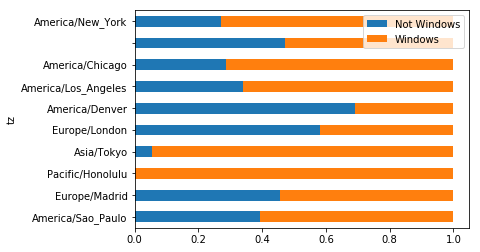

In [23]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh',stacked=True)

### MovieLens 1M数据集


In [28]:
import pandas as pd
unames = ['user_id','gender', 'age', 'occupation', 'zip']
users = pd.read_csv('../pydata/ch02/movielens/users.dat', sep='::', header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../pydata/ch02/movielens/ratings.dat', sep='::', header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies=pd.read_csv('../pydata/ch02/movielens/movies.dat', sep='::', header=None, names=mnames)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if _

In [29]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [31]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [32]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [34]:
mean_ratings = data.pivot_table('rating', index='title',columns='gender', aggfunc=np.mean)
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [35]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [36]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [37]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [38]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_index(by='diff')
sorted_by_diff.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [39]:
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


In [40]:
# 根据电影名称分组的得分数据的标准差
rating_std_by_title = data.groupby('title')['rating'].std()

# 根据active_titles进行过滤
rating_std_by_title = rating_std_by_title.ix[active_titles]

# 根据值对series进行降序排列
rating_std_by_title.sort_values(ascending=False).head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Name: rating, dtype: float64

### 全美婴儿姓名分析
#### 1880-2010年间全美婴儿姓名

In [44]:
! head -n 10 ../pydata/ch02/names/yob1881.txt

In [43]:
import pandas as pd
names1880 = pd.read_csv('../pydata/ch02/names/yob1880.txt', names=['name', 'sex', 'births'] )
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [45]:
names1880.groupby('sex')['births'].sum()

names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [57]:
# 1880-2010
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = '../pydata/ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [58]:
names.groupby('sex')['births'].sum()

sex
F    159990140
M    162412587
Name: births, dtype: int64

In [59]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


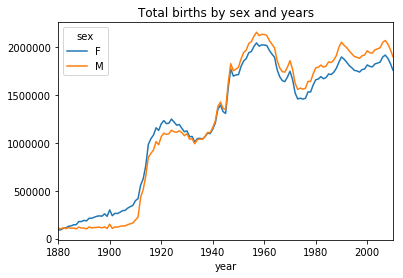

In [60]:
total_births.plot(title='Total births by sex and years')

In [61]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [62]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [63]:
g=names.groupby(['year', 'sex'])
type(g)

pandas.core.groupby.generic.DataFrameGroupBy

 
 ''' [:1000] cannot work as desired '''

def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.head()

 			name 	sex 	births 	year 	prop
year 	sex 						
1947 	F 	431022 	Linda 	F 	99651 	1947 	0.056229
1948 	F 	441381 	Linda 	F 	96185 	1948 	0.056657
1947 	M 	437125 	James 	M 	94601 	1947 	0.051768
1957 	M 	544528 	Michael 	M 	92700 	1957 	0.043008
1947 	M 	437126 	Robert 	M 	91557 	1947 	0.050102

def get_top1000(group):
    #return group.sort_index(by='births', ascending=False)[:1000]
    return group

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.head()
top1000 = top1000.sort_index(by='births', ascending=False)[:1000]
top1000.head()

In [64]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'],as_index=False)
top1000 = grouped.apply(get_top1000)
top1000.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: Future

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: Future

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: Future

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: Future

name sex  births  year      prop
0 0       Mary   F    7065  1880  0.077643
  1       Anna   F    2604  1880  0.028618
  2       Emma   F    2003  1880  0.022013
  3  Elizabeth   F    1939  1880  0.021309
  4     Minnie   F    1746  1880  0.019188

#### 分析命名趋势

In [65]:
boys = top1000[top1000.sex == 'M']
girls= top1000[top1000.sex == 'F']

In [66]:
total_births = top1000.pivot_table('births', index='year', columns='name',aggfunc=sum)
#totle_births = names.pivot_table('births', index='year', columns='name',aggfunc=sum)
total_births.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7568a085f8>,
      dtype=object)

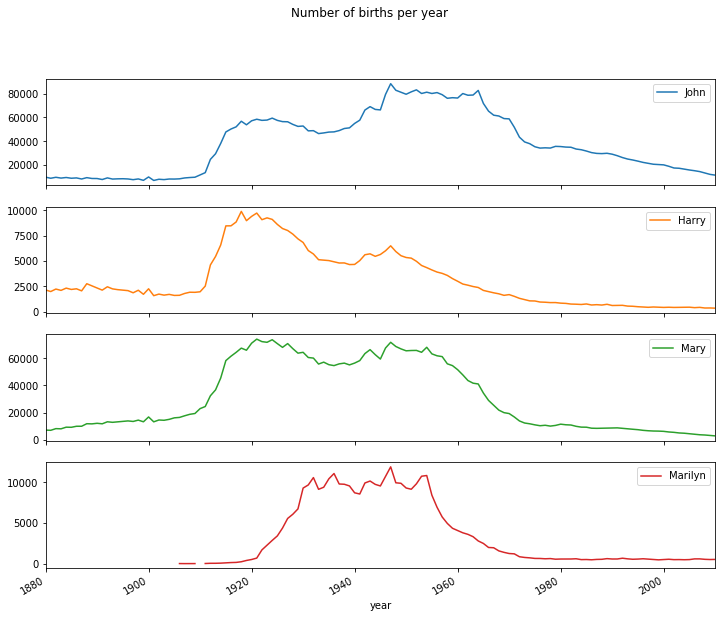

In [67]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
#subset = total_births[['John', 'Mary']]
subset.plot(subplots=True, figsize=(12,10), grid=False, title="Number of births per year")

#### 评估命名多样性的增长

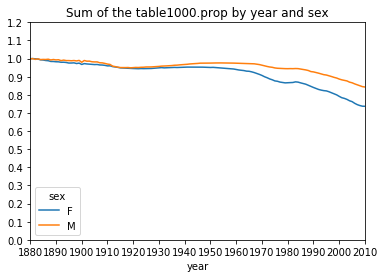

In [68]:
table        = top1000.pivot_table('prop', index='year', columns='sex',aggfunc=sum)
table.plot(title='Sum of the table1000.prop by year and sex', yticks=np.linspace(0, 1.2,13), xticks=range(1880,2020,10) )

In [69]:
boys[boys.year==1947].head()


name sex  births  year      prop
135 437125    James   M   94601  1947  0.051768
    437126   Robert   M   91557  1947  0.050102
    437127     John   M   88251  1947  0.048293
    437128  William   M   66917  1947  0.036618
    437129  Richard   M   58445  1947  0.031982

In [70]:
df = boys[boys.year==1947]

prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()
prop_cumsum.head(10)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


135  437125    0.051768
     437126    0.101870
     437127    0.150162
     437128    0.186781
     437129    0.218763
     437130    0.250365
     437131    0.277976
     437132    0.302502
     437133    0.324782
     437134    0.343875
Name: prop, dtype: float64

In [71]:
prop_cumsum.searchsorted(0.5)

22

In [72]:
df = boys[boys.year == 1900]
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5)+1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


25

In [73]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)+1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: Future

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: Future

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: Future

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: Future

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


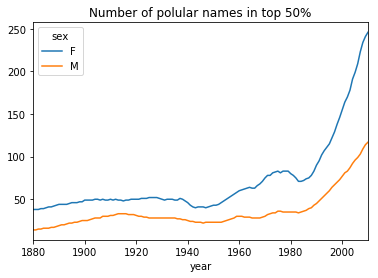

In [74]:
diversity.plot(title='Number of polular names in top 50%')

#### 最后一个字母的变革

In [75]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letters'
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [76]:
# 我们选择代表性的三年
subtable = table.reindex(columns=[1910,1960,2010], level='year')
subtable.head()

sex                  F                            M                    
year              1910      1960      2010     1910      1960      2010
last_letters                                                           
a             108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                  NaN     694.0     450.0    411.0    3912.0   38859.0
c                  5.0      49.0     946.0    482.0   15476.0   23125.0
d               6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e             133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [77]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [78]:
letter_prop = subtable/subtable.sum().astype(float)

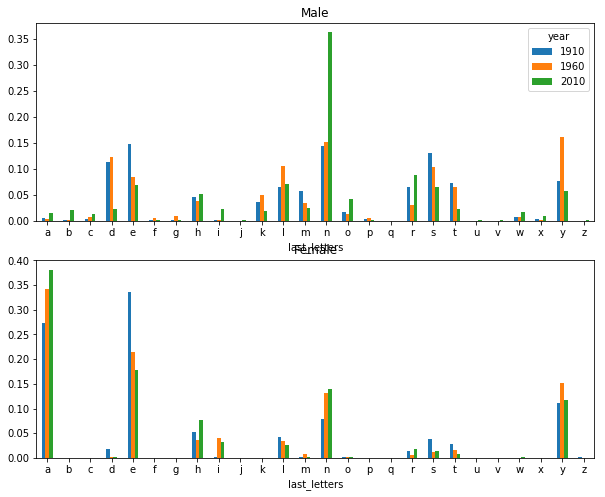

In [79]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1, figsize=(10,8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)


In [80]:
# 选几个典型的字母 d n y
letter_prop = table/table.sum().astype(float)
dny_ts = letter_prop.ix[['d','n','y'], 'M'].T
dny_ts.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


last_letters,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


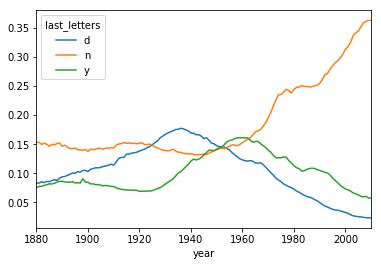

In [81]:
dny_ts.plot()

#### 男孩 ---> 女孩


In [82]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])

In [83]:
all_names.shape

(6868,)

In [84]:
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [85]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [86]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc=sum)
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


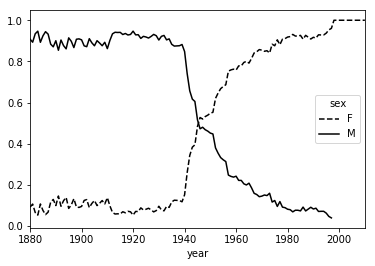

In [87]:
table.plot(style={'M': 'k-', 'F':'k--'})

### 总结

此一章主要介绍了DF的用法，常规操作能解决很多问题
- 分组
- 统计
- 透视图
- 画图
    - pd.plot
    - matplotlib.pyplot.subplot
    
编写或者说抄写代码的时候才发现问题。比如，
+ 1. 区别：
    * groupby(['year', 'sex'])
    * groupby(['year', 'sex'], asindex=False)
+ 2. 取列：
    * names.year
    * names['year']
+ 3. 筛选
    * names[names.year==1880]
+ 4. 文件
    * [ json.loads(line) for l in open('some/file/path') ]